In [1]:
import scanpy as sc 
import matplotlib as plt
import pandas as pd

In [2]:
metrics_results_df = pd.read_csv("/home/augusta/SSS_mount/insituCNV/InSituCNV/Figure2/04_Compare_results_using_metrics/metrics_cnv_inference_across_counts_aug.csv", index_col=0)

In [3]:
metrics_results_df

,type_of_sampling,experiment,n_genes,n_counts,mean_countsxcell,nmi,ari,F1score_all,F1score_gain,F1score_loss,AUC_loss,PR_gains,AUC_loss.1,PR_loss,AUC_gains,n_subsample
0,subsampled,2,all,NaN,37548.426000,0.989037,0.994521,0.877638,0.926463,0.738526,0.802684,0.835405,0.802684,0.320777,0.946252,100
1,subsampled,2,all,NaN,26283.896000,0.963123,0.980532,0.875936,0.935707,0.698483,0.777539,0.858059,0.777539,0.304747,0.953806,70
2,subsampled,2,20000,NaN,19431.750000,0.970034,0.984270,0.872018,0.935318,0.663652,0.757331,0.850679,0.757331,0.230927,0.953979,70
3,subsampled,2,all,NaN,18774.213000,0.981066,0.990463,0.868525,0.935615,0.661650,0.754803,0.858554,0.754803,0.263352,0.953388,50
4,subsampled,2,15000,NaN,9902.858000,0.955868,0.977226,0.849958,0.928288,0.556970,0.702198,0.841398,0.702198,0.073697,0.947964,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,subsampled,3,15000,NaN,200.828860,0.491471,0.464573,0.523288,0.648021,0.000000,0.526181,0.187059,0.526181,0.005871,0.731741,1
185,subsampled,3,10000,NaN,130.575710,0.189447,0.164573,0.368434,0.457948,0.000000,0.521690,0.042650,0.521690,0.005811,0.625307,1
186,subsampled,3,5000,NaN,60.367508,0.126101,0.110898,0.345329,0.431854,0.000000,0.513688,0.035148,0.513688,0.005862,0.612507,1
187,subsampled,3,1000,NaN,14.078075,0.002905,-0.000734,0.049638,0.056697,0.000000,0.505949,0.005170,0.505949,0.007274,0.497443,1


In [4]:
metrics_results_df['n_genes_adjusted'] = metrics_results_df['n_genes'].replace('all', '26000')

n_subsample_to_count = {
    100: 37047,
    70: 25933,
    50: 18524,
    20: 7410,
    10: 3705,
    5: 1852,
    3: 1111,
    2: 741,
    1: 370
}

metrics_results_df['n_subsample_adjusted'] = metrics_results_df['n_subsample'].replace(n_subsample_to_count)

In [262]:
metrics_results_df

,type_of_sampling,experiment,n_genes,n_counts,mean_countsxcell,nmi,ari,F1score_all,F1score_gain,F1score_loss,AUC_loss,PR_gains,AUC_loss.1,PR_loss,AUC_gains,n_subsample,n_genes_adjusted,n_subsample_adjusted
0,subsampled,2,all,NaN,37548.426000,0.989037,0.994521,0.877638,0.926463,0.738526,0.802684,0.835405,0.802684,0.320777,0.946252,100,26000,37047
1,subsampled,2,all,NaN,26283.896000,0.963123,0.980532,0.875936,0.935707,0.698483,0.777539,0.858059,0.777539,0.304747,0.953806,70,26000,25933
2,subsampled,2,20000,NaN,19431.750000,0.970034,0.984270,0.872018,0.935318,0.663652,0.757331,0.850679,0.757331,0.230927,0.953979,70,20000,25933
3,subsampled,2,all,NaN,18774.213000,0.981066,0.990463,0.868525,0.935615,0.661650,0.754803,0.858554,0.754803,0.263352,0.953388,50,26000,18524
4,subsampled,2,15000,NaN,9902.858000,0.955868,0.977226,0.849958,0.928288,0.556970,0.702198,0.841398,0.702198,0.073697,0.947964,50,15000,18524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,subsampled,3,15000,NaN,200.828860,0.491471,0.464573,0.523288,0.648021,0.000000,0.526181,0.187059,0.526181,0.005871,0.731741,1,15000,370
185,subsampled,3,10000,NaN,130.575710,0.189447,0.164573,0.368434,0.457948,0.000000,0.521690,0.042650,0.521690,0.005811,0.625307,1,10000,370
186,subsampled,3,5000,NaN,60.367508,0.126101,0.110898,0.345329,0.431854,0.000000,0.513688,0.035148,0.513688,0.005862,0.612507,1,5000,370
187,subsampled,3,1000,NaN,14.078075,0.002905,-0.000734,0.049638,0.056697,0.000000,0.505949,0.005170,0.505949,0.007274,0.497443,1,1000,370


# Generating the AUC metrics

In [23]:
import pandas as pd
import numpy as np

# Define the metrics to process
metrics = ["AUC_loss", "AUC_gains"]

# Create a dictionary to store matrices
matrices = {}

# Iterate over each experiment and metric to create a matrix
for exp in metrics_results_df["experiment"].unique():
    for metric in metrics:
        # Pivot table to reshape data into matrix form
        matrix = metrics_results_df[metrics_results_df["experiment"] == exp].pivot(
            index="n_subsample_adjusted", columns="n_genes_adjusted", values=metric
        )


        # Store in dictionary with key as (experiment, metric)
        matrices[(exp, metric)] = matrix

        # Print or save the matrix
        print(f"Experiment {exp} - {metric} matrix:")
        print(matrix, "\n")

Experiment 2 - AUC_loss matrix:
n_genes_adjusted          1000     10000     15000     20000     26000  \
n_subsample_adjusted                                                     
370                   0.502029  0.517373  0.521439  0.521129  0.515382   
741                   0.503567  0.516688  0.518663  0.518768  0.512984   
1111                  0.503383  0.518797  0.518996  0.517210  0.513614   
1852                  0.508284  0.517027  0.520493  0.515772  0.525003   
3705                  0.508637  0.565613  0.538672  0.566969  0.612054   
7410                  0.519779  0.673222  0.613301  0.650523  0.690781   
18524                 0.581338  0.752605  0.702198  0.735818  0.754803   
25933                 0.595165  0.778381  0.729898  0.757331  0.777539   
37047                 0.580067  0.804917  0.774165  0.789214  0.802684   

n_genes_adjusted           500      5000  
n_subsample_adjusted                      
370                   0.507734  0.504044  
741                   0.

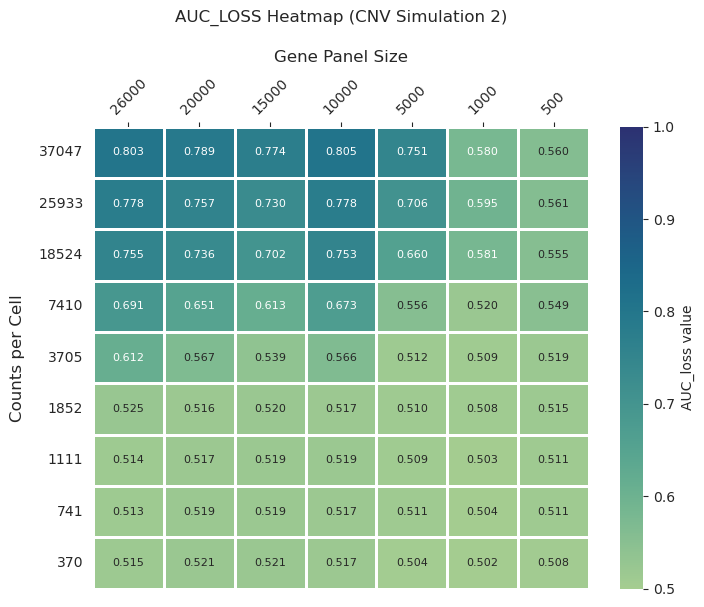

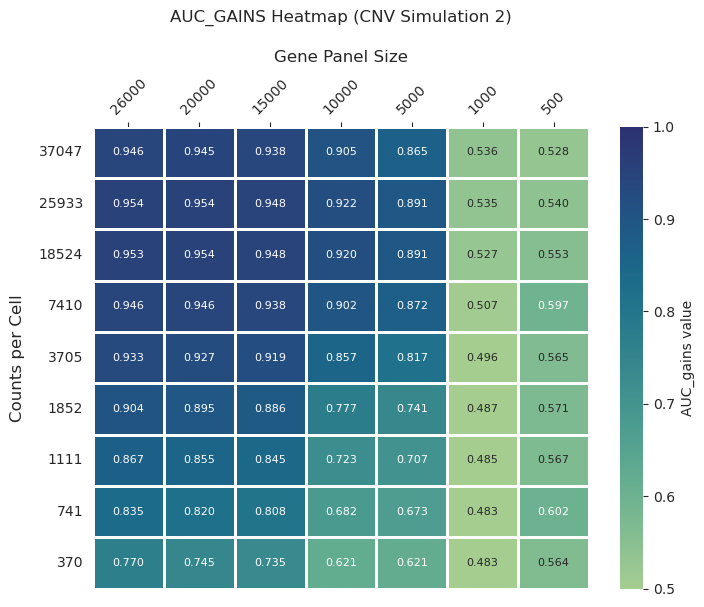

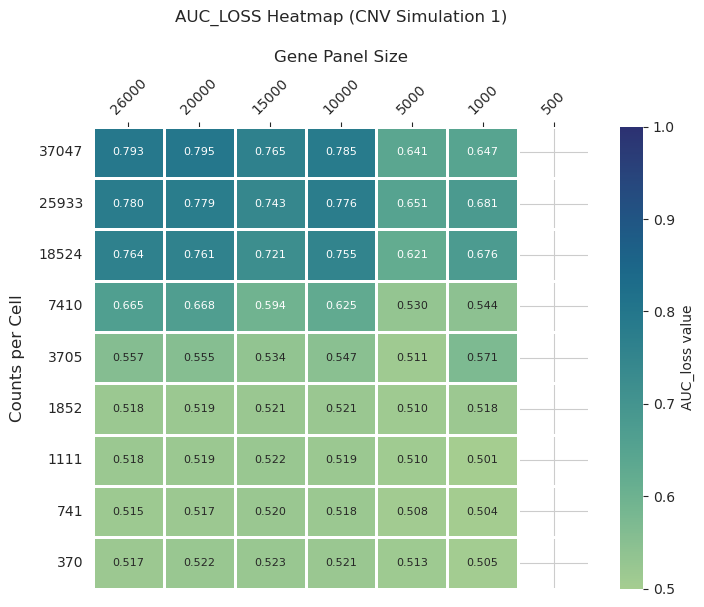

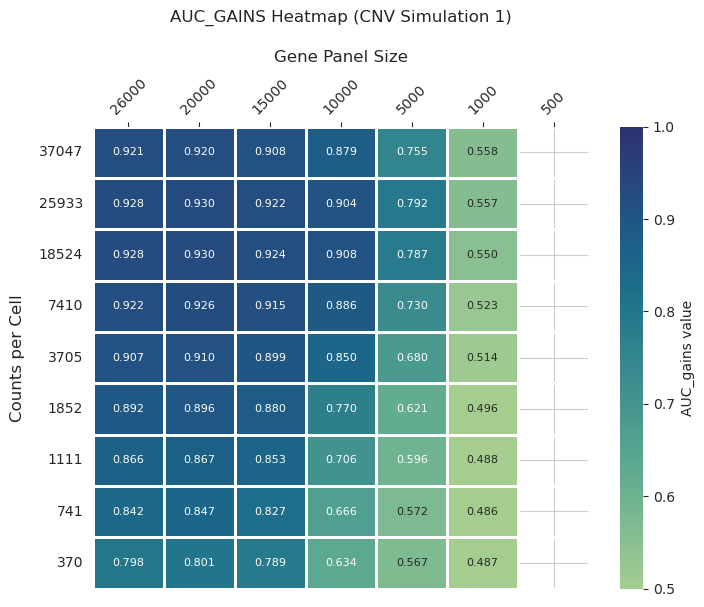

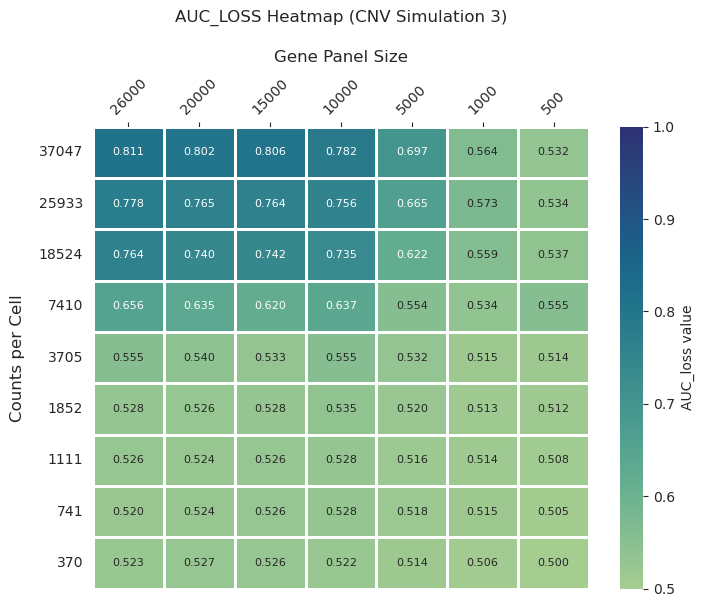

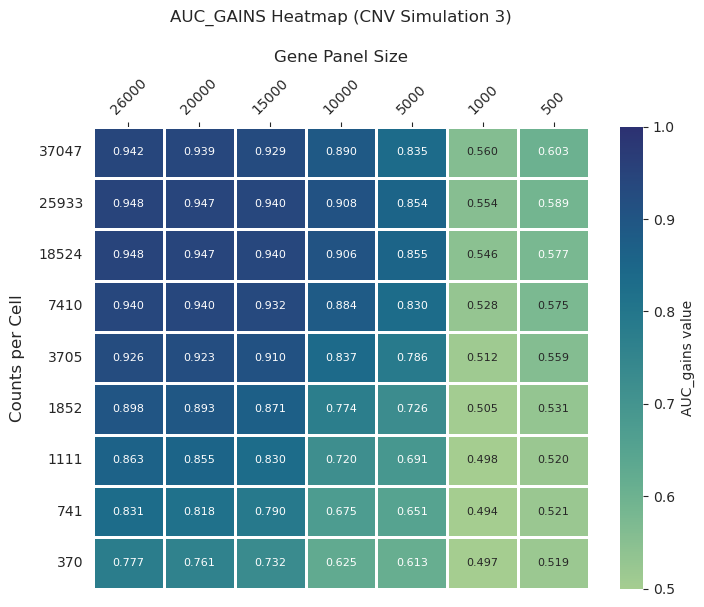

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colormap with custom range
cmap = sns.color_palette("Greys", as_cmap=True)
vmin, vmax = 0.5, 1  # Adjust this range based on your metric values

# Define the correct gene order (convert to integers)
gene_order = [26000, 20000, 15000, 10000, 5000, 1000, 500]

# Loop over each experiment and metric
for (exp, metric), matrix in matrices.items():
    plt.figure(figsize=(8, 6))  # Set figure size

    # Convert column names to integers (if they are stored as strings)
    matrix.columns = matrix.columns.astype(int)

    # Filter gene_order to include only available columns
    existing_gene_order = [col for col in gene_order if col in matrix.columns]
    
    # Reorder columns (gene panel sizes) and rows (count per cell)
    matrix = matrix[existing_gene_order]  # Order only available columns
    matrix = matrix.sort_index(ascending=False)  # Order rows in descending order

    # Create heatmap
    ax = sns.heatmap(matrix, 
                     annot=True, 
                     fmt=".3f",  # Adjust precision of values
                     cmap= "crest" ,#cmap, 
                     vmin=vmin, vmax=vmax,  # Set color range
                     cbar_kws={'label': f'{metric} value'}, 
                     linewidths=1, 
                     linecolor='#ffffff',  # Color of the lines between cells
                     annot_kws={"size": 8})  # Adjust text size

    # Move column labels to the top
    ax.xaxis.tick_top()  
    ax.xaxis.set_label_position('top')

    # **Set axis labels**
    ax.set_xlabel("Gene Panel Size", fontsize=12, labelpad=10)  # X-axis label
    ax.set_ylabel("Counts per Cell", fontsize=12, labelpad=10)  # Y-axis label

    # Adjust axis labels
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)

    # Set title
    plt.title(f"{metric.upper()} Heatmap (CNV Simulation {exp})", fontsize=12, pad=20)

    # Save figure (optional)
    plt.savefig(f"heatmap_{metric}_sim{exp}.pdf", format='pdf', bbox_inches='tight')

    # Show (optional)
    plt.show()


# Generating all other metrics

In [27]:
import pandas as pd
import numpy as np

metrics = ["nmi", "ari", "F1score_all", "F1score_gain", "F1score_loss", 
           "PR_gains", "PR_loss"]

# Create a dictionary to store matrices
matrices = {}

# Iterate over each experiment and metric to create a matrix
for exp in metrics_results_df["experiment"].unique():
    for metric in metrics:
        # Pivot table to reshape data into matrix form
        matrix = metrics_results_df[metrics_results_df["experiment"] == exp].pivot(
            index="n_subsample_adjusted", columns="n_genes_adjusted", values=metric
        )

        # Store in dictionary with key as (experiment, metric)
        matrices[(exp, metric)] = matrix

        # Print or save the matrix
        print(f"Experiment {exp} - {metric} matrix:")
        print(matrix, "\n")

Experiment 2 - nmi matrix:
n_genes_adjusted          1000     10000     15000     20000     26000  \
n_subsample_adjusted                                                     
370                   0.004120  0.049957  0.191008  0.292671  0.463942   
741                   0.006470  0.171517  0.354188  0.544347  0.631264   
1111                  0.002654  0.242808  0.545865  0.631038  0.678021   
1852                  0.005278  0.449456  0.634634  0.697362  0.750682   
3705                  0.006753  0.591120  0.785329  0.866265  0.901143   
7410                  0.016448  0.842559  0.894079  0.960069  0.979548   
18524                 0.023317  0.906045  0.955868  0.980078  0.981066   
25933                 0.018767  0.920505  0.958853  0.970034  0.963123   
37047                 0.027668  0.893014  0.934766  0.974944  0.989037   

n_genes_adjusted           500      5000  
n_subsample_adjusted                      
370                   0.008193  0.052264  
741                   0.00713

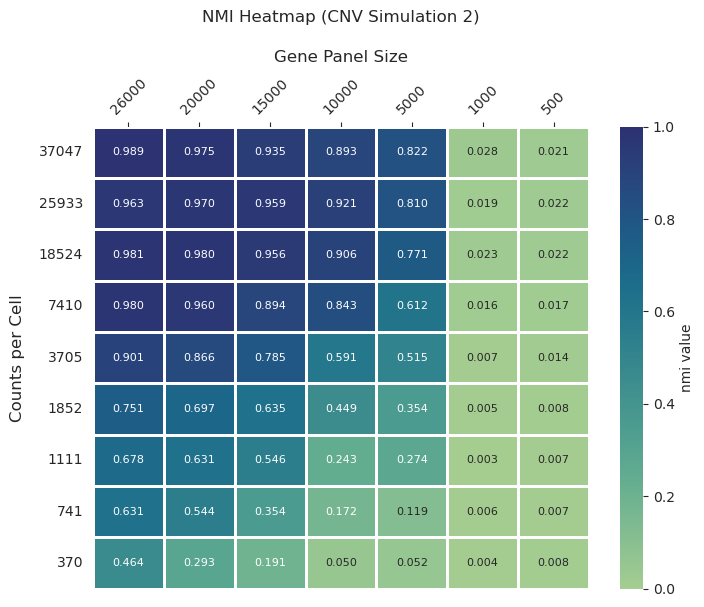

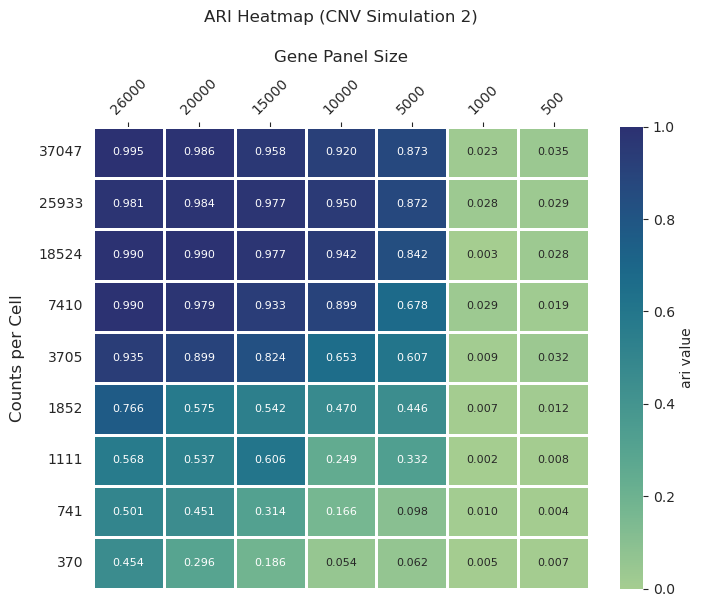

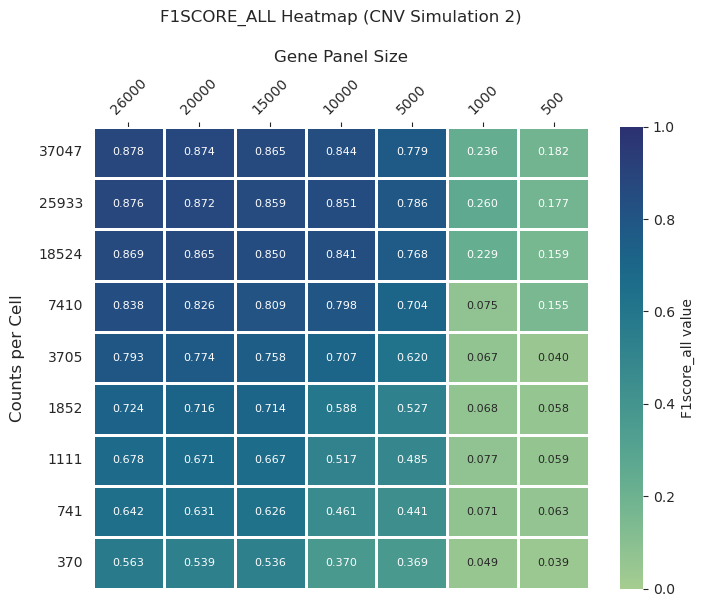

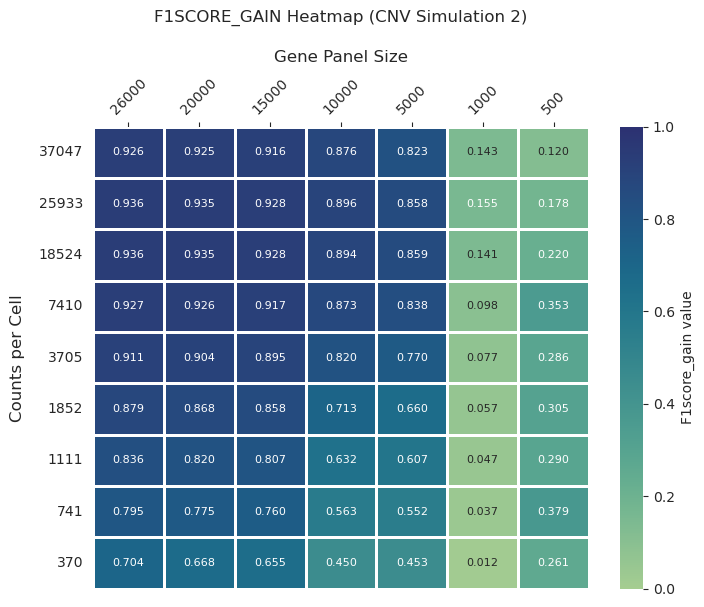

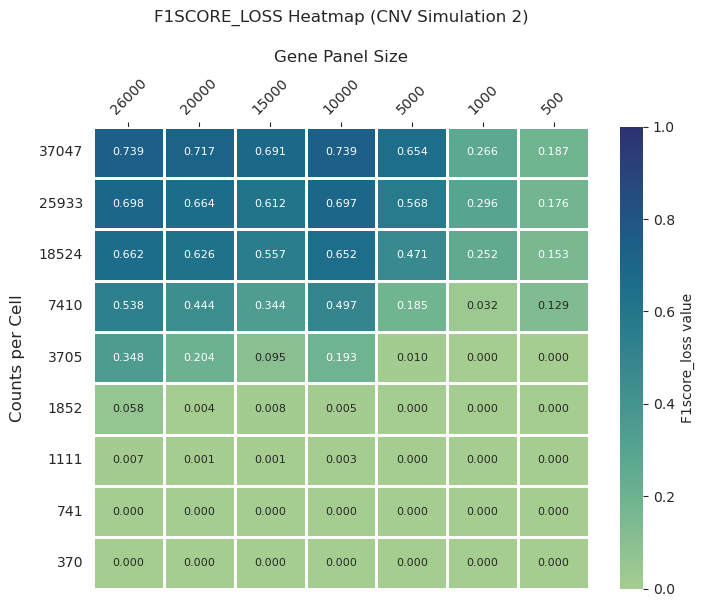

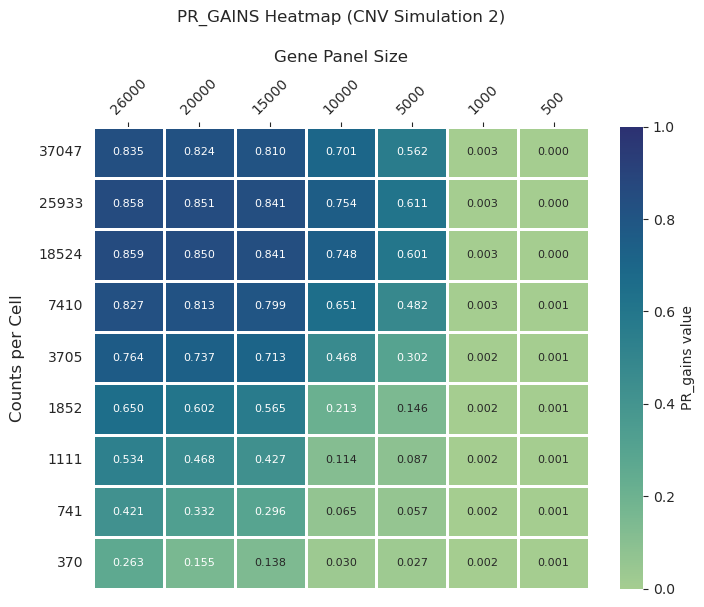

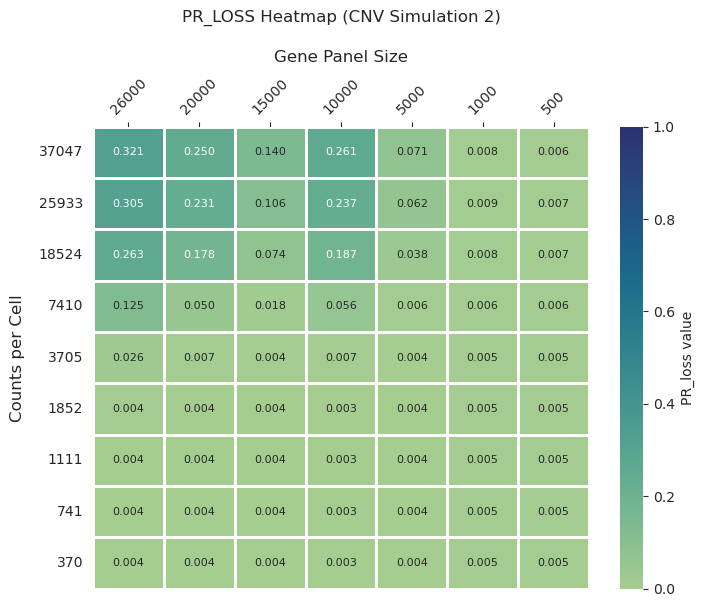

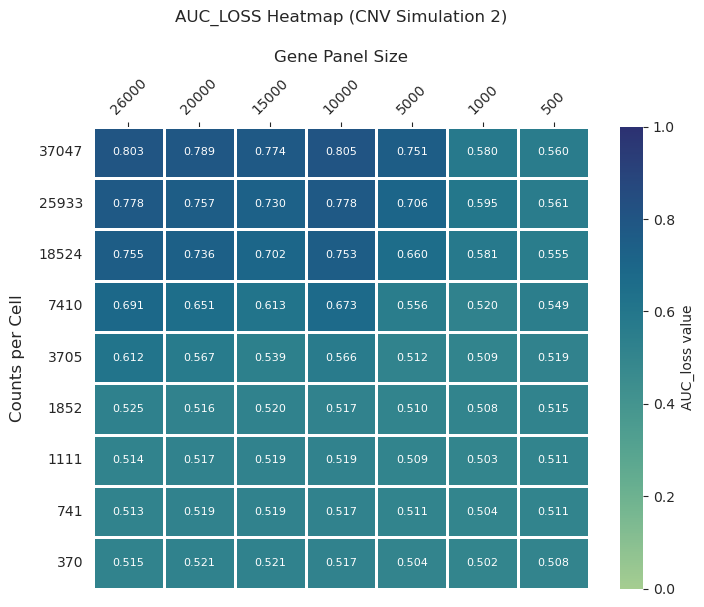

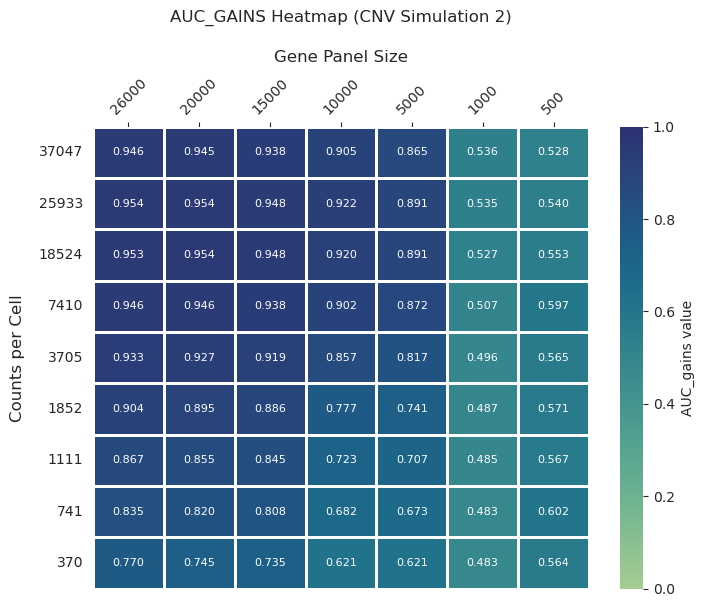

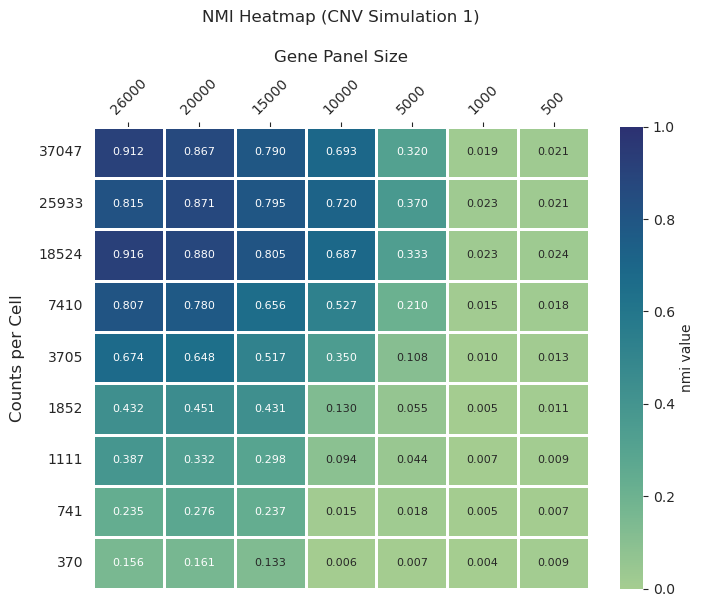

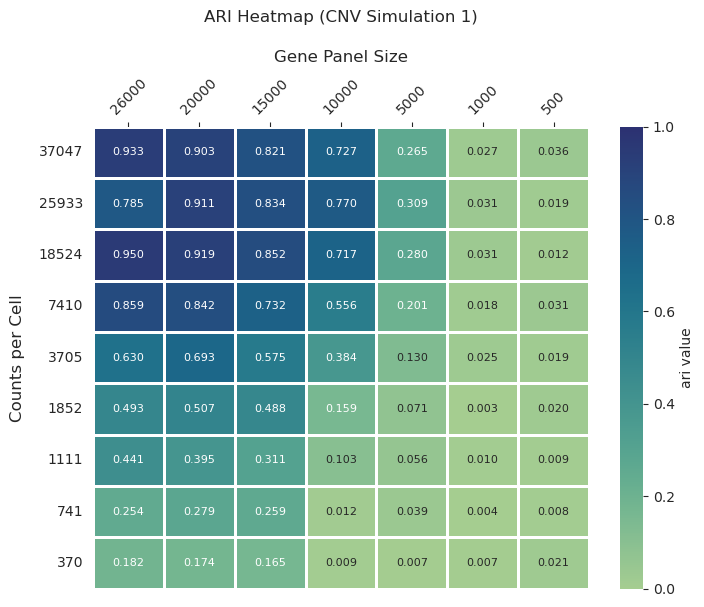

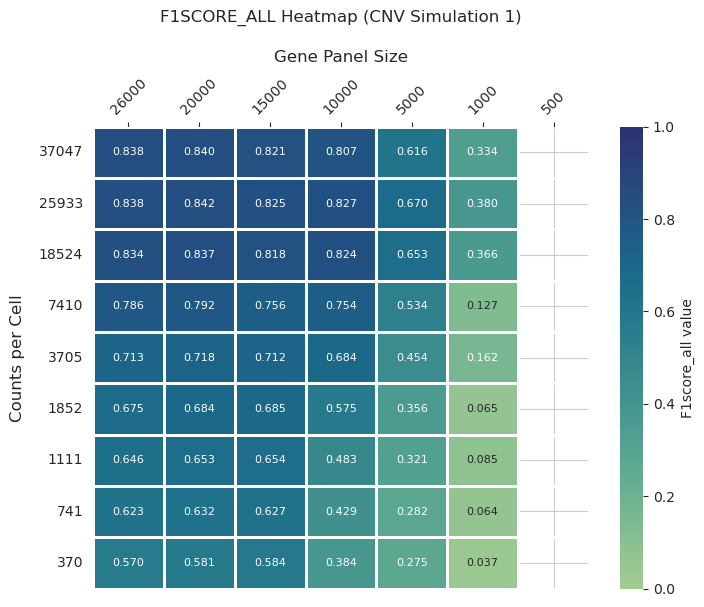

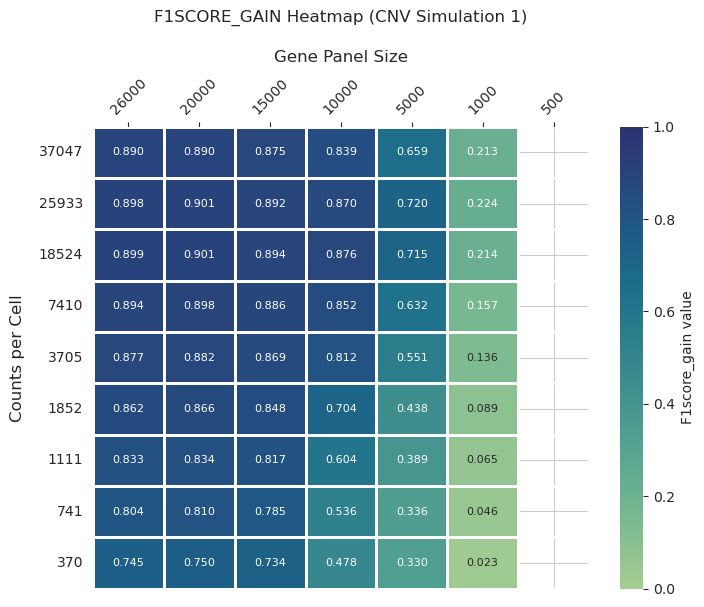

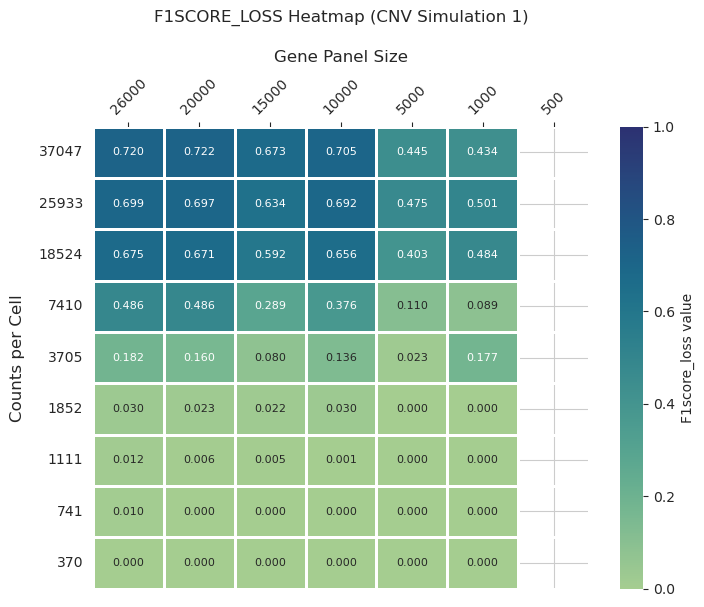

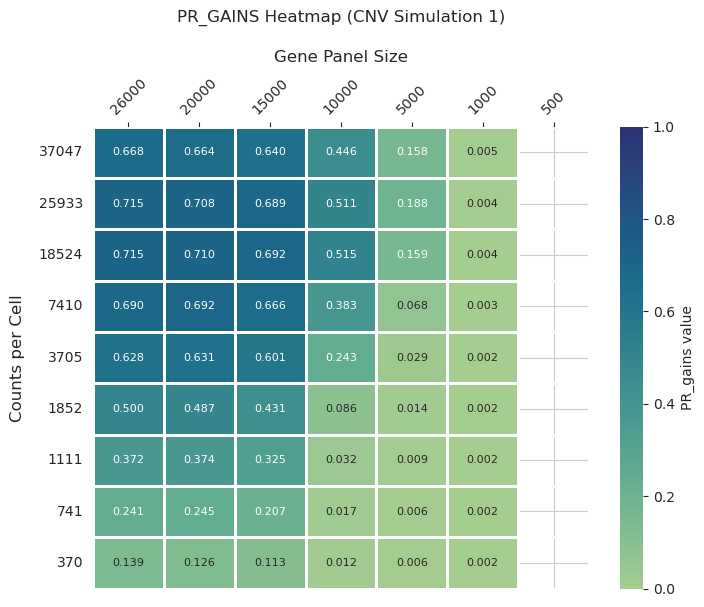

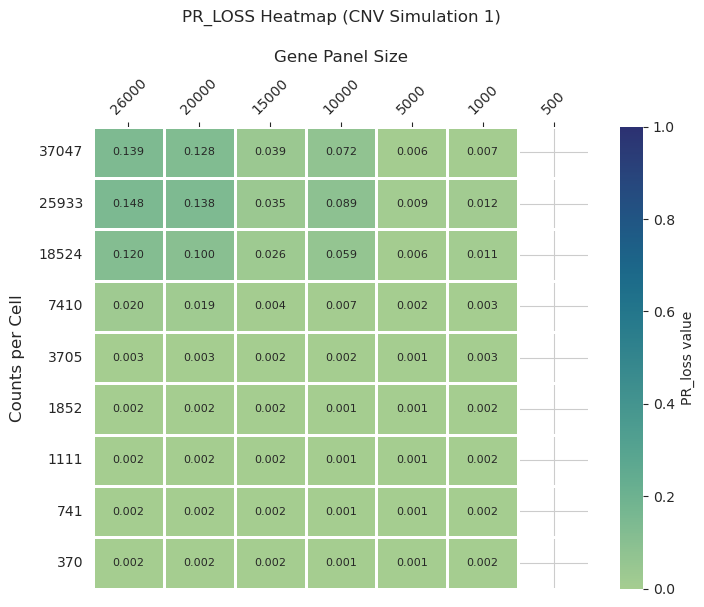

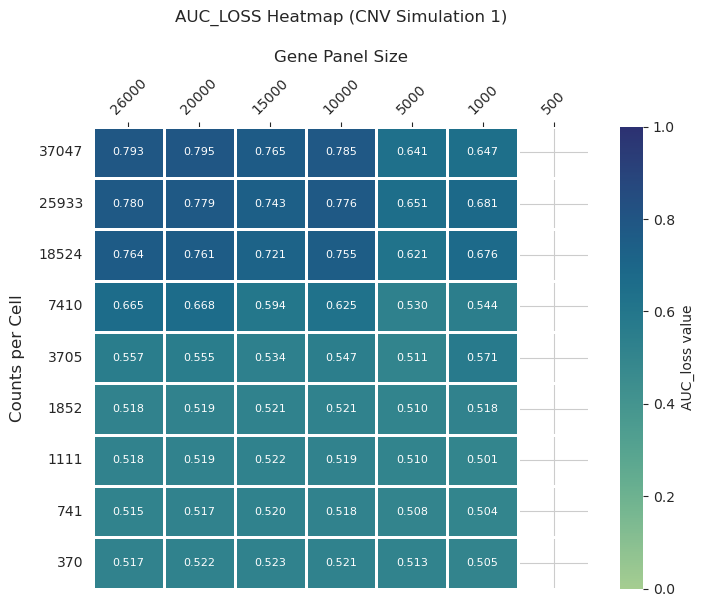

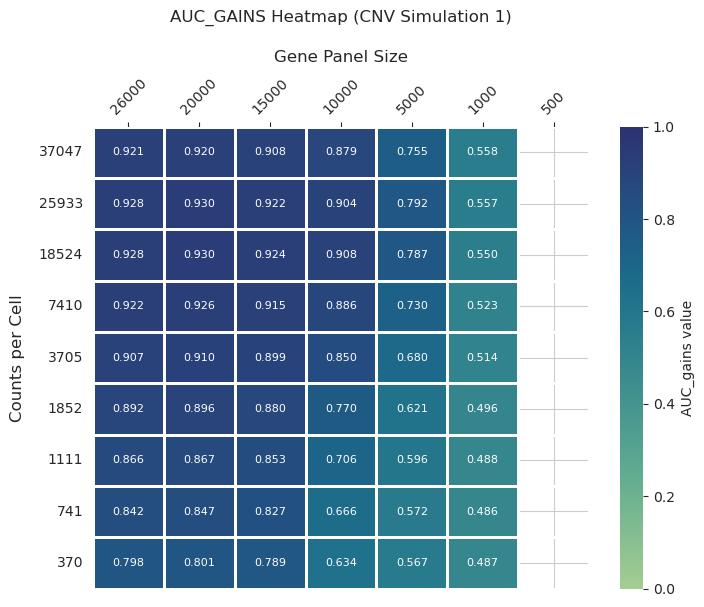

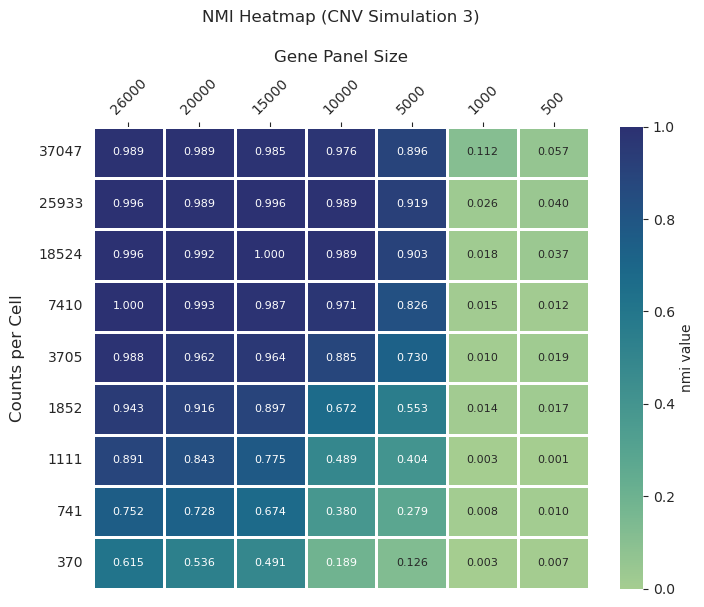

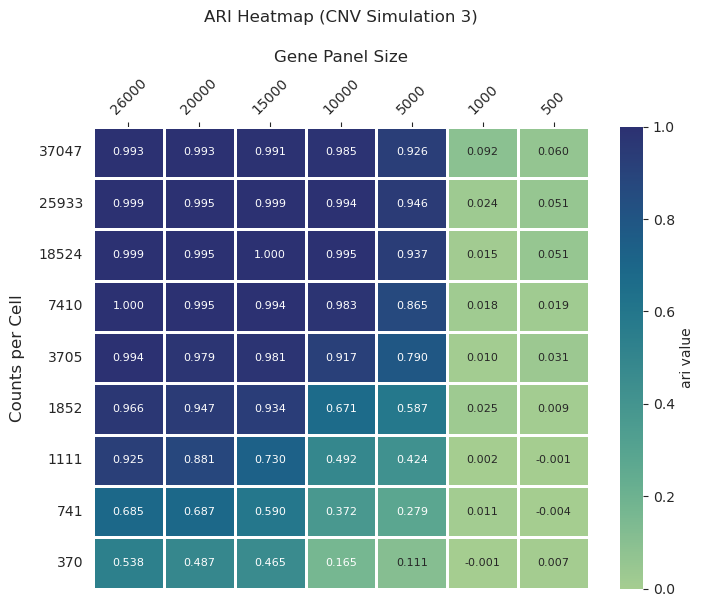

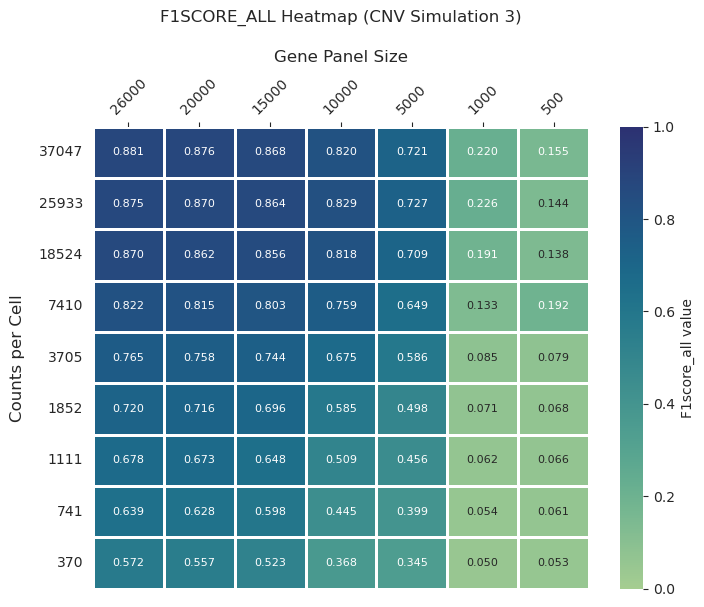

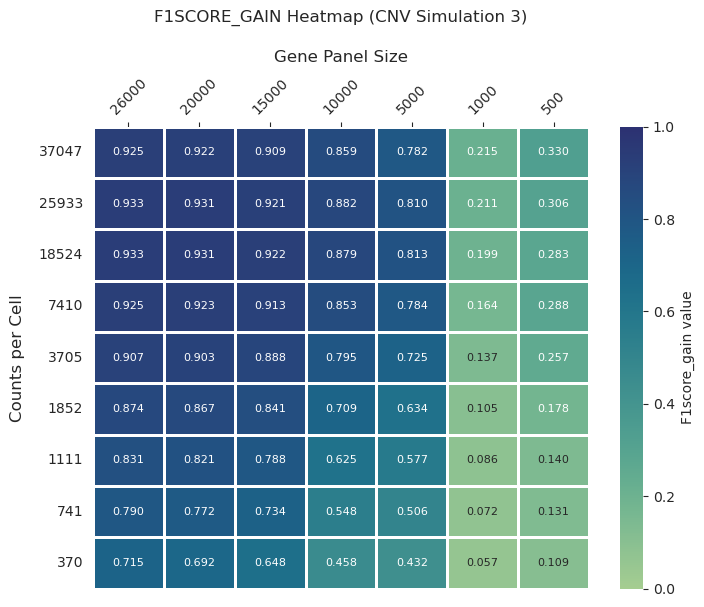

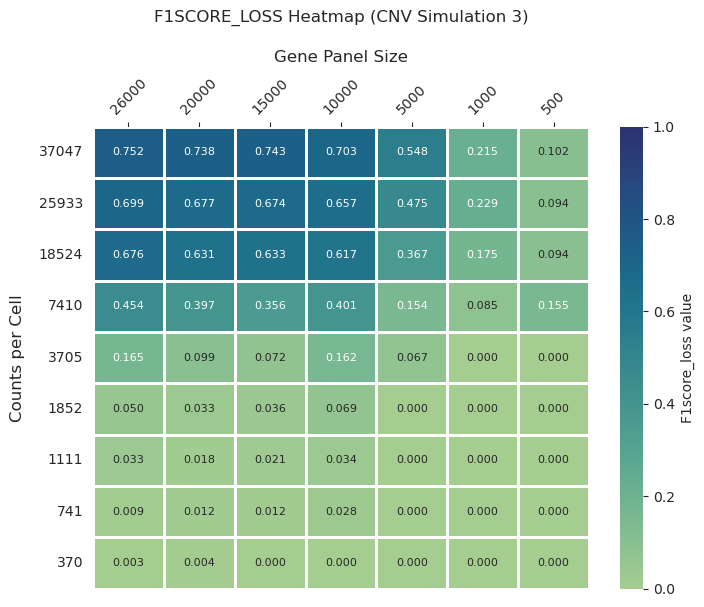

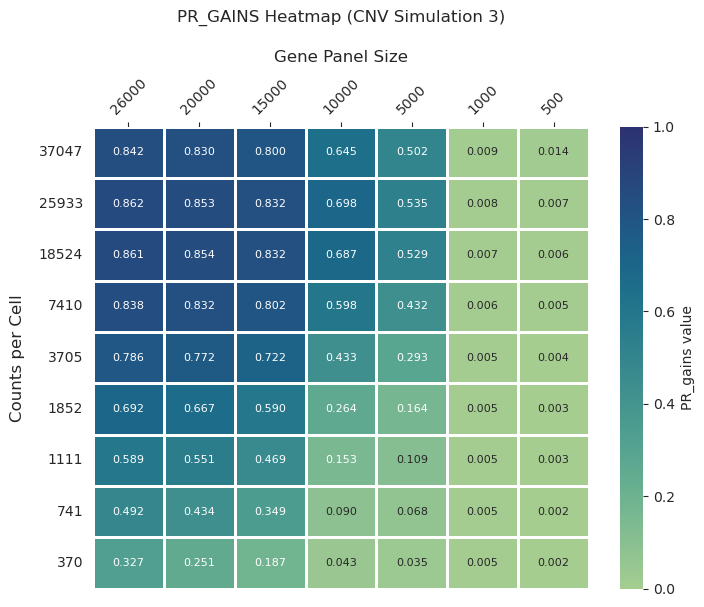

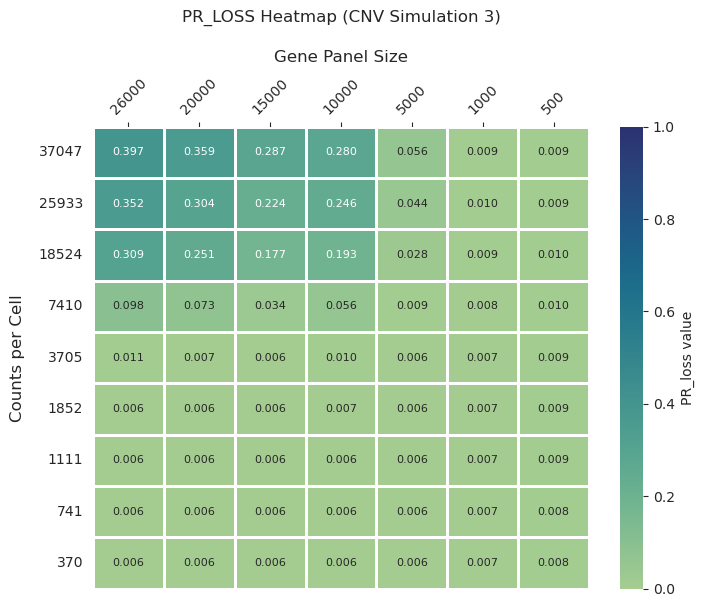

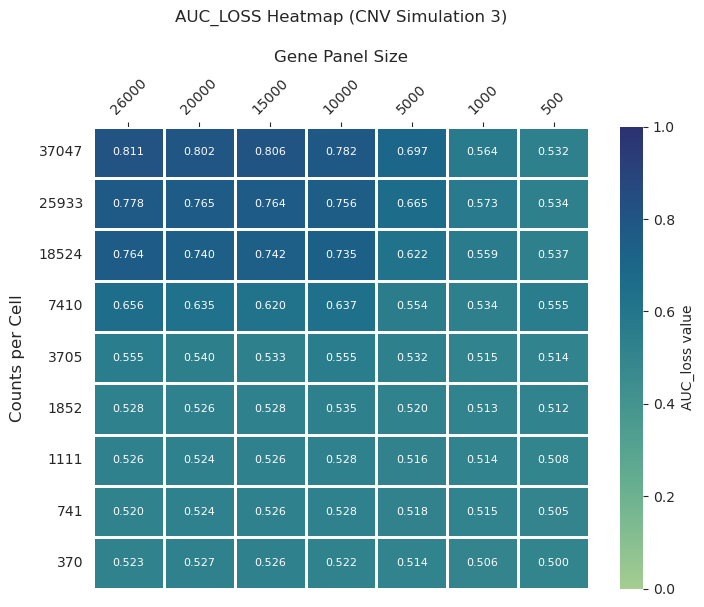

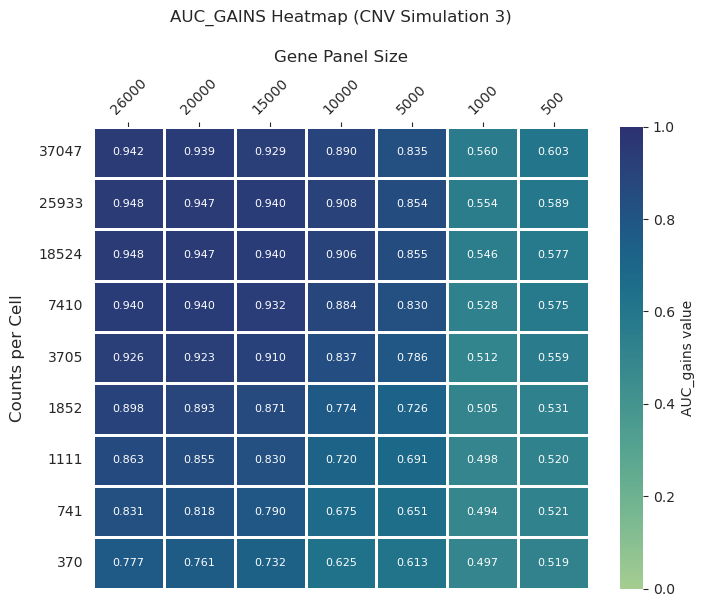

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colormap with custom range
cmap = sns.color_palette("Blues", as_cmap=True)
vmin, vmax = 0, 1  # Adjust this range based on your metric values

# Define the correct gene order (convert to integers)
gene_order = [26000, 20000, 15000, 10000, 5000, 1000, 500]

# Loop over each experiment and metric
for (exp, metric), matrix in matrices.items():
    plt.figure(figsize=(8, 6))  # Set figure size

    # Convert column names to integers (if they are stored as strings)
    matrix.columns = matrix.columns.astype(int)

    # Filter gene_order to include only available columns
    existing_gene_order = [col for col in gene_order if col in matrix.columns]
    
    # Reorder columns (gene panel sizes) and rows (count per cell)
    matrix = matrix[existing_gene_order]  # Order only available columns
    matrix = matrix.sort_index(ascending=False)  # Order rows in descending order

    # Create heatmap
    ax = sns.heatmap(matrix, 
                     annot=True, 
                     fmt=".3f",  # Adjust precision of values
                     cmap= "crest" ,#cmap, 
                     vmin=vmin, vmax=vmax,  # Set color range
                     cbar_kws={'label': f'{metric} value'}, 
                     linewidths=1, 
                     linecolor='#ffffff',  # Color of the lines between cells
                     annot_kws={"size": 8})  # Adjust text size

    # Move column labels to the top
    ax.xaxis.tick_top()  
    ax.xaxis.set_label_position('top')

    # **Set axis labels**
    ax.set_xlabel("Gene Panel Size", fontsize=12, labelpad=10)  # X-axis label
    ax.set_ylabel("Counts per Cell", fontsize=12, labelpad=10)  # Y-axis label

    # Adjust axis labels
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)

    # Set title
    plt.title(f"{metric.upper()} Heatmap (CNV Simulation {exp})", fontsize=12, pad=20)

    # Save figure (optional)
    plt.savefig(f"heatmap_{metric}_sim{exp}.pdf", format='pdf', bbox_inches='tight')

    # Show (optional)
    plt.show()


# Selected conditions

In [328]:
import pandas as pd
import numpy as np

metrics = ["nmi", "ari", "F1score_all", "F1score_gain", "F1score_loss", 
           "PR_gains", "PR_loss", "AUC_loss", "AUC_gains"]

# Create a dictionary to store matrices
matrices = {}

# Iterate over each experiment and metric to create a matrix
for exp in metrics_results_df["experiment"].unique():
    for metric in metrics:
        # Pivot table to reshape data into matrix form
        matrix = metrics_results_df[metrics_results_df["experiment"] == exp].pivot(
            index="n_subsample_adjusted", columns="n_genes_adjusted", values=metric
        )

        # Store in dictionary with key as (experiment, metric)
        matrices[(exp, metric)] = matrix

        # Print or save the matrix
        print(f"Experiment {exp} - {metric} matrix:")
        print(matrix, "\n")

Experiment 2 - nmi matrix:
n_genes_adjusted          1000     10000     15000     20000     26000  \
n_subsample_adjusted                                                     
370                   0.004120  0.049957  0.191008  0.292671  0.463942   
741                   0.006470  0.171517  0.354188  0.544347  0.631264   
1111                  0.002654  0.242808  0.545865  0.631038  0.678021   
1852                  0.005278  0.449456  0.634634  0.697362  0.750682   
3705                  0.006753  0.591120  0.785329  0.866265  0.901143   
7410                  0.016448  0.842559  0.894079  0.960069  0.979548   
18524                 0.023317  0.906045  0.955868  0.980078  0.981066   
25933                 0.018767  0.920505  0.958853  0.970034  0.963123   
37047                 0.027668  0.893014  0.934766  0.974944  0.989037   

n_genes_adjusted           500      5000  
n_subsample_adjusted                      
370                   0.008193  0.052264  
741                   0.00713

# NMI, ARI, F1, PR

## genes

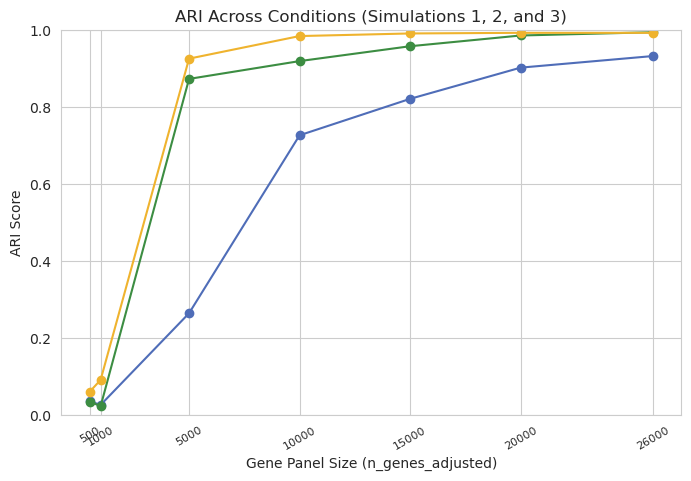

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

conditions_2 = [
    (37047, 26000),  
    (37047, 20000),  
    (37047, 15000), 
    (37047, 10000), 
    (37047, 5000),  
    (37047, 1000),   
    (37047, 500)    
]

def extract_values(simulation, metric_type):
    matrix = matrices[(simulation, metric_type)]  # Access the correct simulation
    matrix.columns = matrix.columns.astype(int)  # Ensure columns are integers
    return [
        matrix.loc[count, n_genes_adjusted]  # Use n_genes_adjusted directly
        for count, n_genes_adjusted in conditions_2  # Update to conditions_2 for n_genes_adjusted
    ]

# Now proceed to extract and plot values
for metric in metrics[1:2]:
    # Plot settings
    plt.figure(figsize=(8, 5))
    sns.set_style("whitegrid")
    
    # Loop through simulations 1, 2, and 3
    for sim in [1, 2, 3]:
        try:
            # Extract values for each simulation
            values = extract_values(sim, metric)
        except KeyError as e:
            print(f"KeyError occurred while extracting values for simulation {sim} and metric {metric}. Column issue: {e}")
            continue
        
        # X-axis values will be the adjusted gene panel sizes (n_genes_adjusted)
        x_values = [g for c, g in conditions_2]  # Use n_genes_adjusted for x-axis

        nature_palette = ['#4F6DB8', '#3C8D42', '#EFB32E', '#D95F02']
        # Plot the metric values across conditions for the current simulation
        if sim == 1:
            plt.plot(x_values, values, marker="o", linestyle="-", color=nature_palette[0], label=f"{metric.upper()} Sim 1")
        elif sim == 2:
            plt.plot(x_values, values, marker="o", linestyle="-", color=nature_palette[1], label=f"{metric.upper()} Sim 2")
        elif sim == 3:
            plt.plot(x_values, values, marker="o", linestyle="-", color=nature_palette[2], label=f"{metric.upper()} Sim 3")

            
    # X-axis labels and settings
    plt.xticks(x_values, rotation=30, size=8)
    plt.xlabel("Gene Panel Size (n_genes_adjusted)")

    # Y-axis settings
    plt.ylabel(f"{metric.upper()} Score")
    plt.ylim(0, 1)

    # Title and legend
    plt.title(f"{metric.upper()} Across Conditions (Simulations 1, 2, and 3)")
    # plt.legend()

    # Optionally, save the figure as a PDF
    # plt.savefig(f"{metric.upper()}_genes_plot.pdf", format="pdf", bbox_inches="tight")

    # Show plot
    plt.show()


## counts

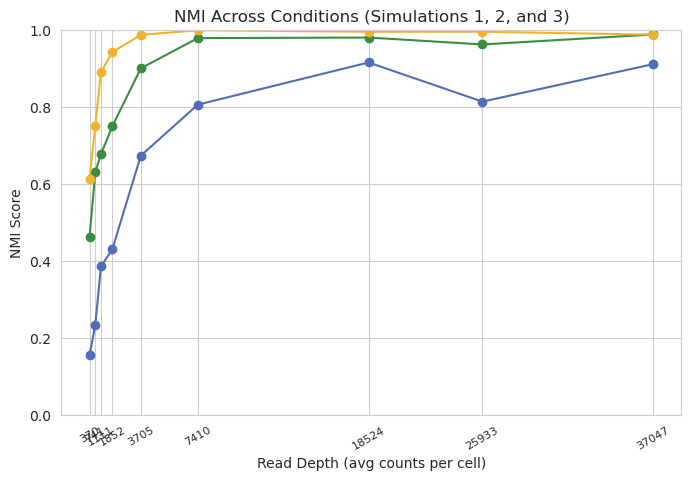

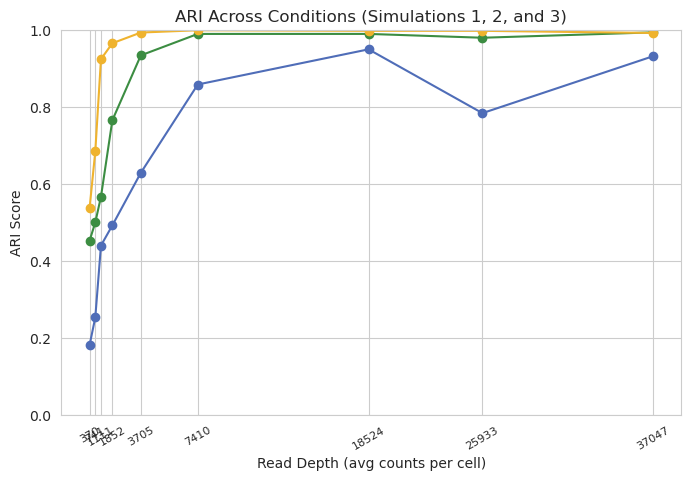

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


conditions_1 = [
    (37047, 26000),  
    (25933, 26000),  
    (18524, 26000),  
    (7410, 26000),  
    (3705, 26000),  
    (1852, 26000), 
    (1111, 26000),
    (741, 26000),
    (370, 26000)
]
  

def extract_values(simulation, metric_type):
    matrix = matrices[(simulation, metric_type)]  # Access the correct simulation
    matrix.columns = matrix.columns.astype(int)  # Ensure columns are integers
    return [
        matrix.loc[count, n_genes_adjusted]  # Use n_genes_adjusted directly (already an integer)
        for count, n_genes_adjusted in conditions_1
    ]

# Now proceed to extract and plot values
for metric in metrics[:2]:
    # Plot settings
    plt.figure(figsize=(8, 5))
    sns.set_style("whitegrid")
    
    # Loop through simulations 1, 2, and 3
    for sim in [1, 2, 3]:
        try:
            # Extract values for each simulation
            values = extract_values(sim, metric)
        except KeyError as e:
            print(f"KeyError occurred while extracting values for simulation {sim} and metric {metric}. Column issue: {e}")
            continue
        
        # X-axis values will be the count values
        x_values = [c for c, g in conditions_1]  # Use counts for x-axis

        nature_palette = ['#4F6DB8', '#3C8D42', '#EFB32E', '#D95F02']
        # Plot the metric values across conditions for the current simulation
        if sim == 1:
            plt.plot(x_values, values, marker="o", linestyle="-", color=nature_palette[0], label=f"{metric.upper()} Sim 1")
        elif sim == 2:
            plt.plot(x_values, values, marker="o", linestyle="-", color=nature_palette[1], label=f"{metric.upper()} Sim 2")
        elif sim == 3:
            plt.plot(x_values, values, marker="o", linestyle="-", color=nature_palette[2], label=f"{metric.upper()} Sim 3")

            
    # X-axis labels and settings
    plt.xticks(x_values, rotation=30, size=8)
    plt.xlabel("Read Depth (avg counts per cell)")

    # Y-axis settings
    plt.ylabel(f"{metric.upper()} Score")
    plt.ylim(0, 1)

    # Title and legend
    plt.title(f"{metric.upper()} Across Conditions (Simulations 1, 2, and 3)")
    # plt.legend()

    # Optionally, save the figure as a PDF
    # plt.savefig(f"{metric.upper()}_counts_plot.pdf", format="pdf", bbox_inches="tight")

    # Show plot
    plt.show()

# AUC 

## genes

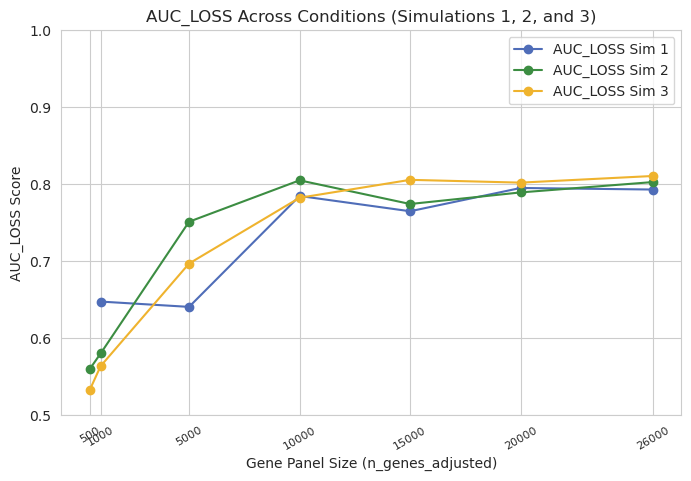

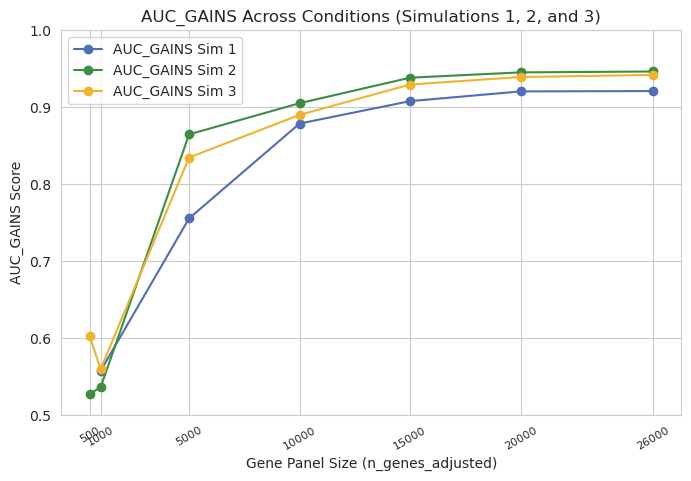

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

conditions_2 = [
    (37047, 26000),  
    (37047, 20000),  
    (37047, 15000), 
    (37047, 10000), 
    (37047, 5000),  
    (37047, 1000),   
    (37047, 500)    
]

def extract_values(simulation, metric_type):
    matrix = matrices[(simulation, metric_type)]  # Access the correct simulation
    matrix.columns = matrix.columns.astype(int)  # Ensure columns are integers
    return [
        matrix.loc[count, n_genes_adjusted]  # Use n_genes_adjusted directly (already an integer)
        for count, n_genes_adjusted in conditions_2  # Update to conditions_2 for n_genes_adjusted
    ]

# Now proceed to extract and plot values
for metric in metrics[7:9]:
    # Plot settings
    plt.figure(figsize=(8, 5))
    sns.set_style("whitegrid")
    
    # Loop through simulations 1, 2, and 3
    for sim in [1, 2, 3]:
        try:
            # Extract values for each simulation
            values = extract_values(sim, metric)
        except KeyError as e:
            print(f"KeyError occurred while extracting values for simulation {sim} and metric {metric}. Column issue: {e}")
            continue
        
        # X-axis values will be the adjusted gene panel sizes (n_genes)
        x_values = [g for c, g in conditions_2]  # Use n_genes_adjusted for x-axis
    
        nature_palette = ['#4F6DB8', '#3C8D42', '#EFB32E', '#D95F02']
        
        # Plot the metric values across conditions for the current simulation
        if sim == 1:
            plt.plot(x_values, values, marker="o", linestyle="-", color=nature_palette[0], label=f"{metric.upper()} Sim 1")
        elif sim == 2:
            plt.plot(x_values, values, marker="o", linestyle="-", color=nature_palette[1], label=f"{metric.upper()} Sim 2")
        elif sim == 3:
            plt.plot(x_values, values, marker="o", linestyle="-", color=nature_palette[2], label=f"{metric.upper()} Sim 3")

    # X-axis labels and settings
    plt.xticks(x_values, rotation=30, size=8)
    plt.xlabel("Gene Panel Size (n_genes_adjusted)")

    # Y-axis settings
    plt.ylabel(f"{metric.upper()} Score")
    plt.ylim(0.5, 1)

    # Title and legend
    plt.title(f"{metric.upper()} Across Conditions (Simulations 1, 2, and 3)")
    # plt.legend()

    # plt.savefig(f"{metric.upper()}_genes_plot.pdf", format="pdf", bbox_inches="tight")

    plt.show()

## counts

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

conditions_1 = [
    (37047, 26000),  
    (25933, 26000),  
    (18524, 26000),  
    (7410, 26000),  
    (3705, 26000),  
    (1852, 26000), 
    (1111, 26000),
    (741, 26000),
    (370, 26000)
]

def extract_values(simulation, metric_type):
    matrix = matrices[(simulation, metric_type)]  # Access the correct simulation
    matrix.columns = matrix.columns.astype(int)  # Ensure columns are integers
    return [
        matrix.loc[count, n_genes_adjusted]  # Use count directly
        for count, n_genes_adjusted in conditions_1  # Update to conditions_1 for count
    ]

# Now proceed to extract and plot values
for metric in metrics[7:9]:
    # Plot settings
    plt.figure(figsize=(8, 5))
    sns.set_style("whitegrid")
    
    # Loop through simulations 1, 2, and 3
    for sim in [1, 2, 3]:
        try:
            # Extract values for each simulation
            values = extract_values(sim, metric)
        except KeyError as e:
            print(f"KeyError occurred while extracting values for simulation {sim} and metric {metric}. Column issue: {e}")
            continue
        
        # X-axis values will be the counts
        x_values = [c for c, g in conditions_1]  # Use counts for x-axis
    
        nature_palette = ['#4F6DB8', '#3C8D42', '#EFB32E', '#D95F02']
        
        # Plot the metric values across conditions for the current simulation
        if sim == 1:
            plt.plot(x_values, values, marker="o", linestyle="-", color=nature_palette[0], label=f"{metric.upper()} Sim 1")
        elif sim == 2:
            plt.plot(x_values, values, marker="o", linestyle="-", color=nature_palette[1], label=f"{metric.upper()} Sim 2")
        elif sim == 3:
            plt.plot(x_values, values, marker="o", linestyle="-", color=nature_palette[2], label=f"{metric.upper()} Sim 3")

    # X-axis labels and settings
    plt.xticks(x_values, rotation=30, size=8)
    plt.xlabel("Counts")

    # Y-axis settings
    plt.ylabel(f"{metric.upper()} Score")
    plt.ylim(0.5, 1)

    # Title and legend
    plt.title(f"{metric.upper()} Across Conditions (Simulations 1, 2, and 3)")
    plt.legend()

    plt.savefig(f"{metric.upper()}_counts_plot.pdf", format="pdf", bbox_inches="tight")

    plt.show()

# AUC (gains + losses)

## genes

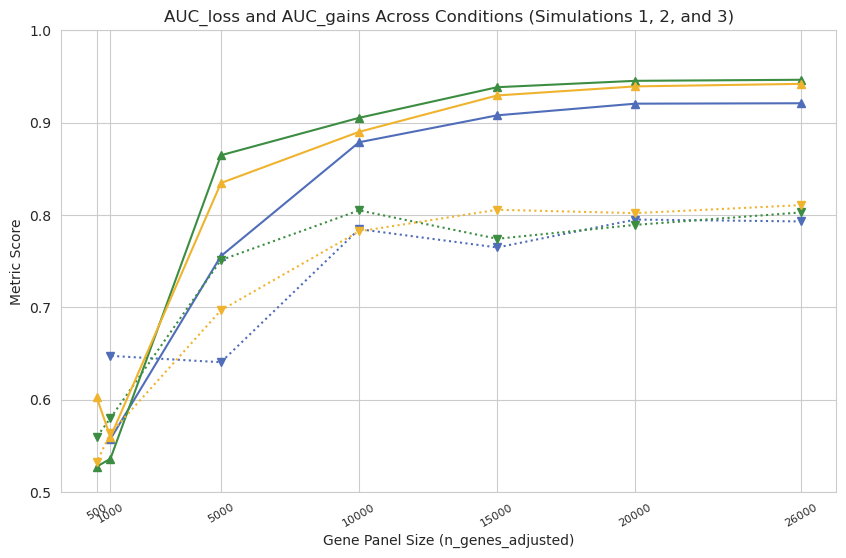

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the conditions and their respective adjusted n_genes (Gene Panel Size)
conditions_2 = [
    (37047, 26000),  # Count 100 → n_genes 26000
    (37047, 20000),  # Count 70 → n_genes 20000
    (37047, 15000),  # Count 50 → n_genes 15000
    (37047, 10000),  # Count 10 → n_genes 10000
    (37047, 5000),   # Count 3 → n_genes 5000
    (37047, 1000),   # Count 2 → n_genes 1000
    (37047, 500)     # Count 1 → n_genes 500
]

# Define the metrics to plot
metrics_to_plot = ['AUC_loss', 'AUC_gains']

def extract_values(simulation, metric_type):
    # Ensure that 'all' is replaced by 26000 and columns are properly formatted as integers
    matrix = matrices[(simulation, metric_type)]  # Access the correct simulation
    matrix.columns = matrix.columns.astype(int)  # Ensure columns are integers
    return [
        matrix.loc[count, n_genes_adjusted]  # Use n_genes_adjusted directly (already an integer)
        for count, n_genes_adjusted in conditions_2  # Update to conditions_2 for n_genes_adjusted
    ]

# Plot settings
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Loop through simulations 1, 2, and 3
for sim in [1, 2, 3]:
    # Loop through both metrics
    for metric in metrics_to_plot:
        try:
            # Extract values for the selected metric in each simulation
            metric_values = extract_values(sim, metric)
        except KeyError as e:
            print(f"KeyError occurred while extracting {metric} values for simulation {sim}. Column issue: {e}")
            continue
        
        # X-axis values will be the adjusted gene panel sizes (n_genes)
        x_values = [g for c, g in conditions_2]  # Use n_genes_adjusted for x-axis

        # Set distinct colors for each metric
        if metric == 'AUC_loss':
            marker = 'v' 
            linestyle = ':'
        elif metric == 'AUC_gains':
            marker = '^' 
            linestyle = '-'

        nature_palette = ['#4F6DB8', '#3C8D42', '#EFB32E', '#D95F02']

        # Plot the metric values across conditions for the current simulation
        if sim == 1:
            plt.plot(x_values, metric_values, marker=marker, linestyle=linestyle, color=nature_palette[0], label=f"{metric} Sim 1")
        elif sim == 2:
            plt.plot(x_values, metric_values, marker=marker, linestyle=linestyle, color=nature_palette[1], label=f"{metric} Sim 2")
        elif sim == 3:
            plt.plot(x_values, metric_values,marker=marker, linestyle=linestyle, color=nature_palette[2], label=f"{metric} Sim 3")

# X-axis labels and settings
plt.xticks(x_values, rotation=30, size=8)
plt.xlabel("Gene Panel Size (n_genes_adjusted)")

# Y-axis settings
plt.ylabel("Metric Score")
plt.ylim(0.5, 1)

# Title and legend
plt.title("AUC_loss and AUC_gains Across Conditions (Simulations 1, 2, and 3)")
# plt.legend()

# Optionally, save the figure as a PDF
# plt.savefig(f"AUC_loss_AUC_gains_genes_plot.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()


# F1 

## counts

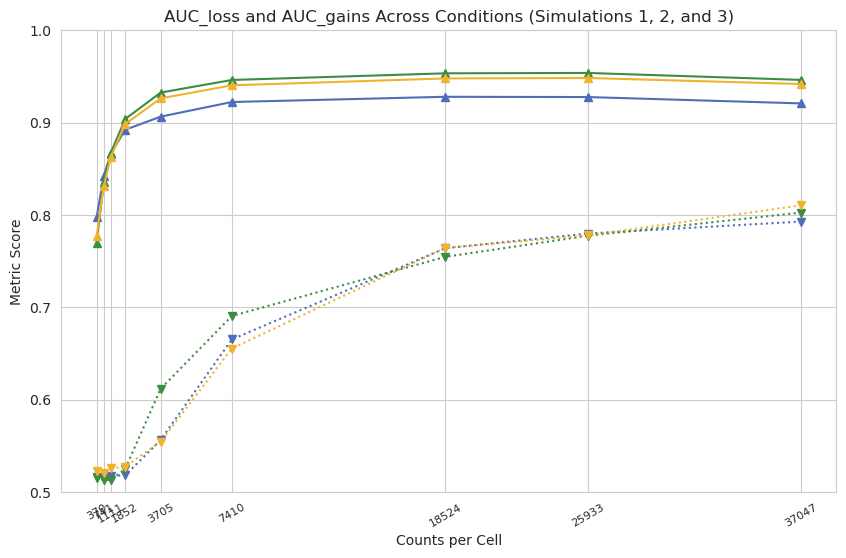

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the conditions and their respective counts
conditions_1 = [
    (37047, 26000),  
    (25933, 26000),  
    (18524, 26000),  
    (7410, 26000),  
    (3705, 26000),  
    (1852, 26000), 
    (1111, 26000),
    (741, 26000),
    (370, 26000)
]

# Define the metrics to plot
metrics_to_plot = ['AUC_loss', 'AUC_gains']

def extract_values(simulation, metric_type):
    matrix = matrices[(simulation, metric_type)]  # Access the correct simulation
    matrix.columns = matrix.columns.astype(int)  # Ensure columns are integers
    
    return [
        matrix.loc[count, 26000]  # Always using n_genes = 26000
        for count, _ in conditions_1  # Using counts from conditions_1
    ]

# Plot settings
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Loop through simulations 1, 2, and 3
for sim in [1, 2, 3]:
    for metric in metrics_to_plot:
        try:
            metric_values = extract_values(sim, metric)
        except KeyError as e:
            print(f"KeyError: {e}")
            continue
        
        # X-axis values will now be counts instead of gene panel sizes
        x_values = [c for c, g in conditions_1]

        # Set distinct styles
        marker = 'v' if metric == 'AUC_loss' else '^'
        linestyle = ':' if metric == 'AUC_loss' else '-'

        nature_palette = ['#4F6DB8', '#3C8D42', '#EFB32E', '#D95F02']

        # Plot the metric values across counts
        plt.plot(x_values, metric_values, marker=marker, linestyle=linestyle, 
                 color=nature_palette[sim-1], label=f"{metric} Sim {sim}")

# X-axis labels and settings
plt.xticks(x_values, rotation=30, size=8)
plt.xlabel("Counts per Cell")  # Updated X-axis label

# Y-axis settings
plt.ylabel("Metric Score")
plt.ylim(0.5, 1)

# Title and legend
plt.title("AUC_loss and AUC_gains Across Conditions (Simulations 1, 2, and 3)")
# plt.legend()

# Optionally, save the figure
# plt.savefig(f"AUC_loss_AUC_gains_counts_plot.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()


# F1 (gain + losses)

## genes

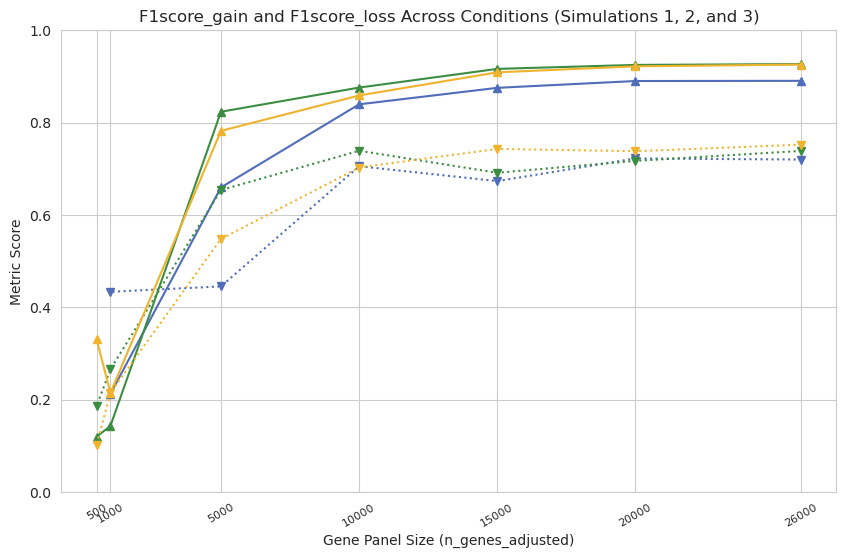

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the conditions and their respective adjusted n_genes (Gene Panel Size)
conditions_2 = [
    (37047, 26000),  # Count 100 → n_genes 26000
    (37047, 20000),  # Count 70 → n_genes 20000
    (37047, 15000),  # Count 50 → n_genes 15000
    (37047, 10000),  # Count 10 → n_genes 10000
    (37047, 5000),   # Count 3 → n_genes 5000
    (37047, 1000),   # Count 2 → n_genes 1000
    (37047, 500)     # Count 1 → n_genes 500
]

# Define the metrics to plot
metrics_to_plot = ['F1score_gain', 'F1score_loss']

def extract_values(simulation, metric_type):
    # Ensure that 'all' is replaced by 26000 and columns are properly formatted as integers
    matrix = matrices[(simulation, metric_type)]  # Access the correct simulation
    matrix.columns = matrix.columns.astype(int)  # Ensure columns are integers
    return [
        matrix.loc[count, n_genes_adjusted]  # Use n_genes_adjusted directly (already an integer)
        for count, n_genes_adjusted in conditions_2  # Update to conditions_2 for n_genes_adjusted
    ]

# Plot settings
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Loop through simulations 1, 2, and 3
for sim in [1, 2, 3]:
    # Loop through both metrics
    for metric in metrics_to_plot:
        try:
            # Extract values for the selected metric in each simulation
            metric_values = extract_values(sim, metric)
        except KeyError as e:
            print(f"KeyError occurred while extracting {metric} values for simulation {sim}. Column issue: {e}")
            continue
        
        # X-axis values will be the adjusted gene panel sizes (n_genes)
        x_values = [g for c, g in conditions_2]  # Use n_genes_adjusted for x-axis

        # Set distinct colors for each metric
        if metric == 'F1score_loss':
            marker = 'v' 
            linestyle = ':'
        elif metric == 'F1score_gain':
            marker = '^' 
            linestyle = '-'

        nature_palette = ['#4F6DB8', '#3C8D42', '#EFB32E', '#D95F02']

        # Plot the metric values across conditions for the current simulation
        if sim == 1:
            plt.plot(x_values, metric_values, marker=marker, linestyle=linestyle, color=nature_palette[0], label=f"{metric} Sim 1")
        elif sim == 2:
            plt.plot(x_values, metric_values, marker=marker, linestyle=linestyle, color=nature_palette[1], label=f"{metric} Sim 2")
        elif sim == 3:
            plt.plot(x_values, metric_values,marker=marker, linestyle=linestyle, color=nature_palette[2], label=f"{metric} Sim 3")

# X-axis labels and settings
plt.xticks(x_values, rotation=30, size=8)
plt.xlabel("Gene Panel Size (n_genes_adjusted)")

# Y-axis settings
plt.ylabel("Metric Score")
plt.ylim(0, 1)

# Title and legend
plt.title("F1score_gain and F1score_loss Across Conditions (Simulations 1, 2, and 3)")
# plt.legend()

# Optionally, save the figure as a PDF
# plt.savefig(f"F1score_gain_F1score_loss_genes_plot.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()


## counts

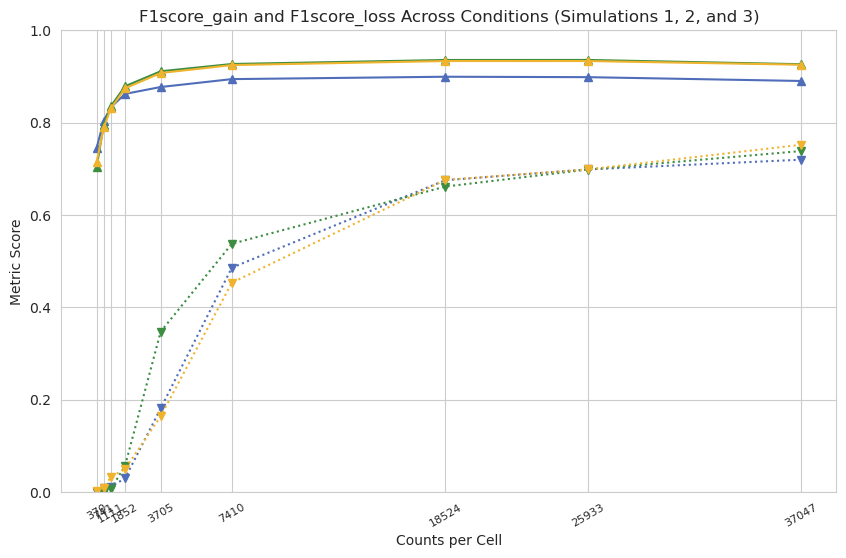

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the conditions and their respective counts
conditions_1 = [
    (37047, 26000),  
    (25933, 26000),  
    (18524, 26000),  
    (7410, 26000),  
    (3705, 26000),  
    (1852, 26000), 
    (1111, 26000),
    (741, 26000),
    (370, 26000)
]

# Define the metrics to plot
metrics_to_plot = ['F1score_gain', 'F1score_loss']

def extract_values(simulation, metric_type):
    matrix = matrices[(simulation, metric_type)]  # Access the correct simulation
    matrix.columns = matrix.columns.astype(int)  # Ensure columns are integers
    
    return [
        matrix.loc[count, 26000]  # Always using n_genes = 26000
        for count, _ in conditions_1  # Using counts from conditions_1
    ]

# Plot settings
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Loop through simulations 1, 2, and 3
for sim in [1, 2, 3]:
    for metric in metrics_to_plot:
        try:
            metric_values = extract_values(sim, metric)
        except KeyError as e:
            print(f"KeyError: {e}")
            continue
        
        # X-axis values will now be counts instead of gene panel sizes
        x_values = [c for c, g in conditions_1]

        # Set distinct styles
        marker = 'v' if metric == 'F1score_loss' else '^'
        linestyle = ':' if metric == 'F1score_loss' else '-'

        nature_palette = ['#4F6DB8', '#3C8D42', '#EFB32E', '#D95F02']

        # Plot the metric values across counts
        plt.plot(x_values, metric_values, marker=marker, linestyle=linestyle, 
                 color=nature_palette[sim-1], label=f"{metric} Sim {sim}")

# X-axis labels and settings
plt.xticks(x_values, rotation=30, size=8)
plt.xlabel("Counts per Cell")  # Updated X-axis label

# Y-axis settings
plt.ylabel("Metric Score")
plt.ylim(0, 1)

# Title and legend
plt.title("F1score_gain and F1score_loss Across Conditions (Simulations 1, 2, and 3)")
# plt.legend()

# Optionally, save the figure
# plt.savefig(f"F1score_gain_F1score_loss_counts_plot.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()


# PR (gains + losses)

## genes

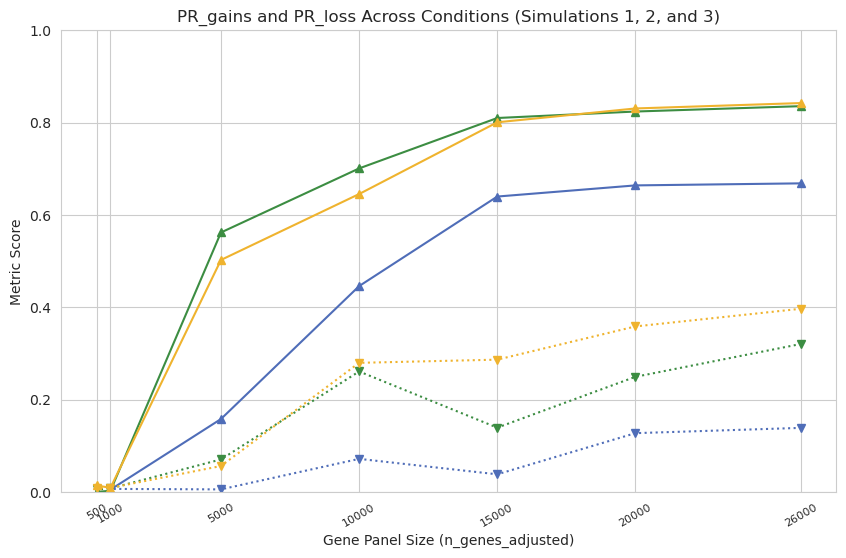

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the conditions and their respective adjusted n_genes (Gene Panel Size)
conditions_2 = [
    (37047, 26000),  # Count 100 → n_genes 26000
    (37047, 20000),  # Count 70 → n_genes 20000
    (37047, 15000),  # Count 50 → n_genes 15000
    (37047, 10000),  # Count 10 → n_genes 10000
    (37047, 5000),   # Count 3 → n_genes 5000
    (37047, 1000),   # Count 2 → n_genes 1000
    (37047, 500)     # Count 1 → n_genes 500
]

# Define the metrics to plot
metrics_to_plot = ['PR_gains', 'PR_loss']

def extract_values(simulation, metric_type):
    # Ensure that 'all' is replaced by 26000 and columns are properly formatted as integers
    matrix = matrices[(simulation, metric_type)]  # Access the correct simulation
    matrix.columns = matrix.columns.astype(int)  # Ensure columns are integers
    return [
        matrix.loc[count, n_genes_adjusted]  # Use n_genes_adjusted directly (already an integer)
        for count, n_genes_adjusted in conditions_2  # Update to conditions_2 for n_genes_adjusted
    ]

# Plot settings
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Loop through simulations 1, 2, and 3
for sim in [1, 2, 3]:
    # Loop through both metrics
    for metric in metrics_to_plot:
        try:
            # Extract values for the selected metric in each simulation
            metric_values = extract_values(sim, metric)
        except KeyError as e:
            print(f"KeyError occurred while extracting {metric} values for simulation {sim}. Column issue: {e}")
            continue
        
        # X-axis values will be the adjusted gene panel sizes (n_genes)
        x_values = [g for c, g in conditions_2]  # Use n_genes_adjusted for x-axis

        # Set distinct colors for each metric
        if metric == 'PR_loss':
            marker = 'v' 
            linestyle = ':'
        elif metric == 'PR_gains':
            marker = '^' 
            linestyle = '-'
        
        nature_palette = ['#4F6DB8', '#3C8D42', '#EFB32E', '#D95F02']

        # Plot the metric values across conditions for the current simulation
        if sim == 1:
            plt.plot(x_values, metric_values, marker=marker, linestyle=linestyle, color=nature_palette[0], label=f"{metric} Sim 1")
        elif sim == 2:
            plt.plot(x_values, metric_values, marker=marker, linestyle=linestyle, color=nature_palette[1], label=f"{metric} Sim 2")
        elif sim == 3:
            plt.plot(x_values, metric_values,marker=marker, linestyle=linestyle, color=nature_palette[2], label=f"{metric} Sim 3")

# X-axis labels and settings
plt.xticks(x_values, rotation=30, size=8)
plt.xlabel("Gene Panel Size (n_genes_adjusted)")

# Y-axis settings
plt.ylabel("Metric Score")
plt.ylim(0, 1)

# Title and legend
plt.title("PR_gains and PR_loss Across Conditions (Simulations 1, 2, and 3)")
# plt.legend()

# Optionally, save the figure as a PDF
# plt.savefig(f"PR_gains_PR_loss_genes_plot.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()


## counts

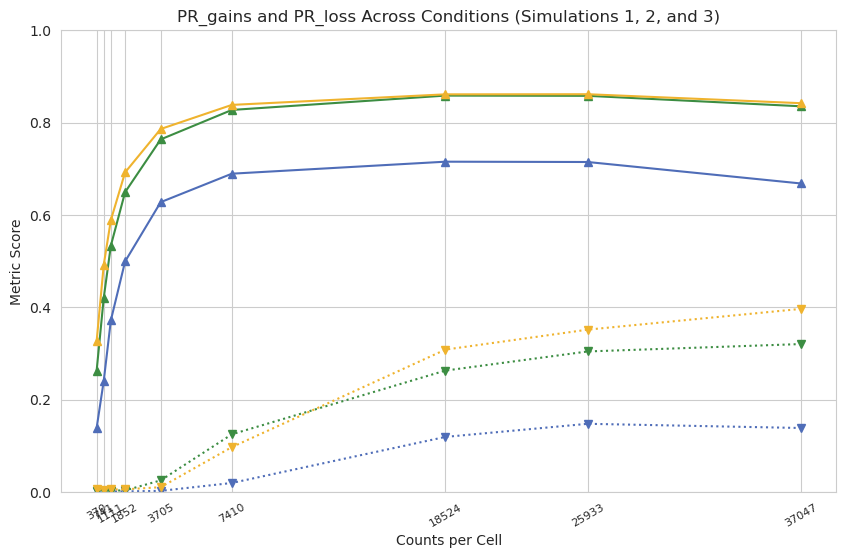

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the conditions and their respective counts
conditions_1 = [
    (37047, 26000),  
    (25933, 26000),  
    (18524, 26000),  
    (7410, 26000),  
    (3705, 26000),  
    (1852, 26000), 
    (1111, 26000),
    (741, 26000),
    (370, 26000)
]

# Define the metrics to plot
metrics_to_plot = ['PR_gains', 'PR_loss']

def extract_values(simulation, metric_type):
    matrix = matrices[(simulation, metric_type)]  # Access the correct simulation
    matrix.columns = matrix.columns.astype(int)  # Ensure columns are integers
    
    return [
        matrix.loc[count, 26000]  # Always using n_genes = 26000
        for count, _ in conditions_1  # Using counts from conditions_1
    ]

# Plot settings
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Loop through simulations 1, 2, and 3
for sim in [1, 2, 3]:
    for metric in metrics_to_plot:
        try:
            metric_values = extract_values(sim, metric)
        except KeyError as e:
            print(f"KeyError: {e}")
            continue
        
        # X-axis values will now be counts instead of gene panel sizes
        x_values = [c for c, g in conditions_1]

        # Set distinct styles
        marker = 'v' if metric == 'PR_loss' else '^'
        linestyle = ':' if metric == 'PR_loss' else '-'

        nature_palette = ['#4F6DB8', '#3C8D42', '#EFB32E', '#D95F02']

        # Plot the metric values across counts
        plt.plot(x_values, metric_values, marker=marker, linestyle=linestyle, 
                 color=nature_palette[sim-1], label=f"{metric} Sim {sim}")

# X-axis labels and settings
plt.xticks(x_values, rotation=30, size=8)
plt.xlabel("Counts per Cell")  # Updated X-axis label

# Y-axis settings
plt.ylabel("Metric Score")
plt.ylim(0, 1)

# Title and legend
plt.title("PR_gains and PR_loss Across Conditions (Simulations 1, 2, and 3)")
# plt.legend()

# Optionally, save the figure
# plt.savefig(f"PR_gains_PR_loss_counts_plot.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()
